In [1]:
# ##########随机森林##########
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.datasets import load_wine
# import pandas as pd
# import numpy as np

# wine = load_wine()
# data = pd.DataFrame(wine.data)
# data.head()
# target = pd.DataFrame(wine.target)
# target.head()

,0
0,0
1,0
2,0
3,0
4,0


In [40]:
# # X = wine.data()
# # y = wine.target()
# Xtrain, Xtest, Ytrain, Ytest = train_test_split(wine.data, wine.target, test_size=3)

# clf = DecisionTreeClassifier()
# rfc = RandomForestClassifier()
# clf = clf.fit(Xtrain, Ytrain)
# rcf = rfc.fit(Xtrain, Ytrain)

# score_c = clf.score(Xtest, Ytest)
# score_r = rcf.score(Xtest, Ytest)

# print('Score of DecisionTree: {}; score of RandomForest: {}'.format(score_c, score_r))

In [115]:
#回归森林填nan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.impute import SimpleImputer

boston = load_boston()
# pd.DataFrame(boston.data).head()
X_full = boston.data
y_full = boston.target

sample_n = X_full.shape[0]
feature_n = X_full.shape[1]

rng = np.random.RandomState(0)
missing_rate = 0.5
missing_n = int(np.floor((sample_n * feature_n) * missing_rate))

missing_index = rng.randint(0, sample_n, missing_n)
missing_feature = rng.randint(0, feature_n, missing_n)

X_missing = X.copy()
y_missing = y.copy()

X_missing[missing_index, missing_feature] = np.nan

X_missing = pd.DataFrame(X_missing)
X_missing.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,NaN,NaN,2.31,0.0,NaN,6.575,65.2,4.0900,1.0,NaN,NaN,NaN,NaN
1,0.02731,0.0,NaN,0.0,0.469,6.421,NaN,4.9671,2.0,242.0,17.8,NaN,9.14
2,0.02729,NaN,7.07,0.0,NaN,7.185,NaN,4.9671,NaN,242.0,NaN,392.83,4.03
3,0.03237,0.0,NaN,NaN,0.458,NaN,NaN,NaN,NaN,222.0,18.7,394.63,NaN
4,NaN,0.0,2.18,0.0,0.458,NaN,54.2,NaN,3.0,NaN,18.7,396.90,NaN


In [116]:
null_order_idx = np.argsort(X_missing.isnull().sum())

for i in null_order_idx:
    tempx= pd.concat([X_missing.iloc[:,X_missing.columns!=i], pd.DataFrame(y_missing)], axis=1)
    tempy=X_missing.iloc[:,i]
    tempx.head()
    tempy.head()

    df = SimpleImputer(missing_values = np.nan
                      ,strategy = 'constant'
                      ,fill_value = 0
                      ).fit_transform(tempx) #df是nparray

    Ytrain = pd.DataFrame(tempy[tempy.notnull()])
    Ytest = tempy[tempy.isnull()]
    Xtrain = pd.DataFrame(df[Ytrain.index,:])#
    Xtest = df[Ytest.index, :]
    # Ytrain
    # Xtrain

    rfc = RandomForestRegressor()
    rfc = rfc.fit(Xtrain, Ytrain)
    pre = rfc.predict(Xtest)

    X_missing.loc[X_missing.iloc[:,i].isnull(),i] = pre




C:\Users\HUA\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\HUA\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\HUA\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\HUA\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\HUA\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The defaul

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64

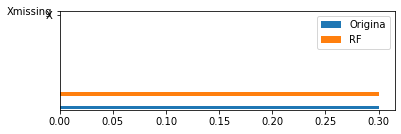

In [150]:
#X_missing : df; X, y: np.array
mse = []
for i in [X, X_missing]:
    rfc = RandomForestRegressor(random_state=0
                               ,n_estimators = 100)
    score = cross_val_score(rfc, i, y
                            , scoring = 'neg_mean_squared_error'
                            , cv = 5).mean()

    mse.append(score)

# mse
# fig = plt.figure(fig)
plt.figure()
ax = plt.subplot(2,1,1)
ax.barh(mse[0], width=0.3, label = 'Origina')
ax.barh(mse[1], width=0.3, label ='RF')
ax.legend()
ax.set_yticks([1,2])
ax.set_yticklabels([ 'X', 'Xmissing']) #先set_yticks 然后set_yticklabels 就对应上了
# ax.ylim(12)
plt.show()
